# The Sparks Foundation Internship

## Rebecca Georgiana

### Task 1 - Prediction using supervised machine learning

### Problem statement : predict the percentage of an student based on the no. of study hours. 

### solution : Simple linear regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [4]:
# importing data 
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Data contains the following columns.

Hours : the number of hours the student spent learning.

Scores : marks of the student.

In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


data has 25 rows and 2 columns

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Descriptive statistics of the data

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the dependent variable

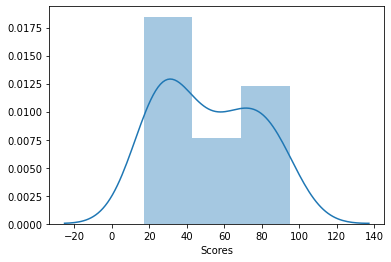

In [13]:
sns.distplot(data['Scores'])

Distplot infers that, the students has most students,scored between 20-40.

Data follows a bimodal distribution.

## correlation 

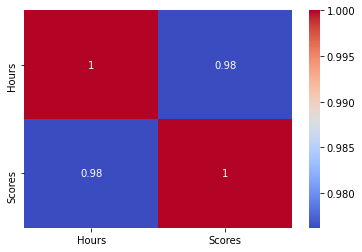

In [16]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [18]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


since hours has the direct corelatation value of 1. 
hours feature is directly corelated with scores.

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [46]:
data.shape

(25, 2)

## Training the linear regression model.
we have got a basic understanding from the data and now the data is splitted into x array and y array. where x array consists of features from which the model is to be trained. the y array with the target variable.


In [59]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
print(X.shape, Y.shape)

(25, 1) (25,)


### Spliting into training  and testing data

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0 )


In [61]:
print('training data {}, testing_data {}'.format(X_train.shape,X_test.shape))

training data (20, 1), testing_data (5, 1)


In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

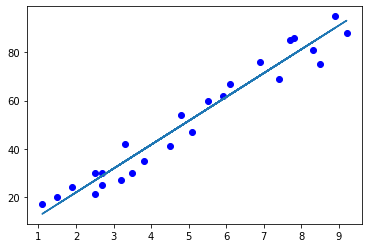

In [66]:
line = lr.coef_*X+lr.intercept_

#plottting 
plt.scatter(X,Y,color = 'b')
plt.plot(X,line)
plt.show()

## Predictions

In [67]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [69]:
y_pred = lr.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [70]:
# Actual VS predicted 
dt = pd.DataFrame({'ACTUAL' : Y_test , 'Predcited' : y_pred})
dt

,ACTUAL,Predcited
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [72]:
# testing with own data
hours = 9.25
arr = np.array([hours])
arr = arr.reshape(-1,1)
pred = lr.predict(arr)
print(pred)

[93.69173249]


if a student spends 9.25 hours in studying then he might score 93%

## Evaluvation Metrics 

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665
